In [203]:
### 导入工具
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 
print('Import Done!')

Import Done!


In [204]:
#一、 Acquire data
print(os.getcwd())
os.chdir('D:\OuMeng\充电资料\Titanic-ML\Data')
print(os.listdir())
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

D:\OuMeng\充电资料\Titanic-ML\Data
['gender_submission.csv', 'Processed_test_df.csv', 'Processed_train_df.csv', 'test.csv', 'train.csv']


In [205]:
#二、 Describing data
# 此处为对数据的认知，首先描述数据，分析数据，然后矫正数据
print(train_df.columns.values)
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
#(2.1) 描述数据基本描述
# 分类Categorical : Survival,Sex,and Embarked. 
# 次序Ordinal：Pclass
# 连续Continous：Age，Fare，
# 离散Discrete: SibSp，Parch
# Ticket/Carbin： 是一列由数字和字母组成的数据
# Name: 是一列可能出现错误的数据
# Cabin/Age/Embarked 是包含blank、null、empty values值得数据

# train_df.info()
# test_df.info()
#以上；7列是整数和浮点数数据，5列是字符串数据


In [207]:
#(2,2) 具体描述

#   数值型数据
#    Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
#    Survived is a categorical feature with 0 or 1 values.
#    Around 38% samples survived representative of the actual survival rate at 32%.
#    Most passengers (> 75%) did not travel with parents or children.
#    Nearly 30% of the passengers had siblings and/or spouse aboard.
#    Fares varied significantly with few passengers (<1%) paying as high as $512.
#    Few elderly passengers (<1%) within age range 65-80.

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [208]:
#（2,3,1）整体description 分析数据
   # Names are unique across the dataset (count=unique=891)
   # Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
   # Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
   # Embarked takes three possible values. S port used by most passengers (top=S)
   # Ticket feature has high ratio (22%) of duplicate values (unique=681).
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lehmann, Miss. Bertha",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [209]:
# 相关性分析
# 相关性 Pclass
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().\
sort_values(by='Survived',ascending=False)


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [210]:
# 相关性 Sex
train_df[['Sex',"Survived"]].groupby(['Sex'],as_index=False).mean().\
sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [211]:
# 相关性 SibSp
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().\
sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [212]:
# 相关性 Parch
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().\
sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


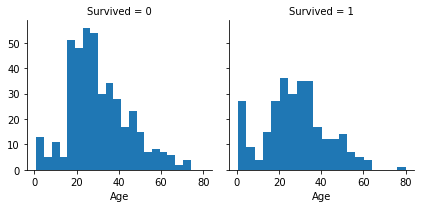

In [213]:
# 相关性 Age
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

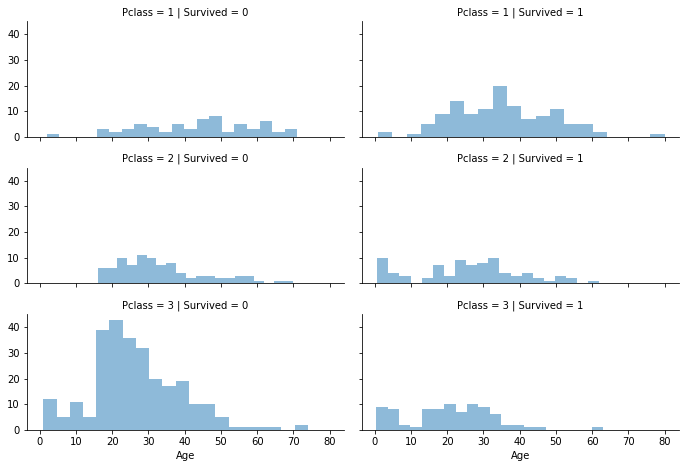

In [214]:
# 相关性 Age and Pclass
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=2.2)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
#grid.add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


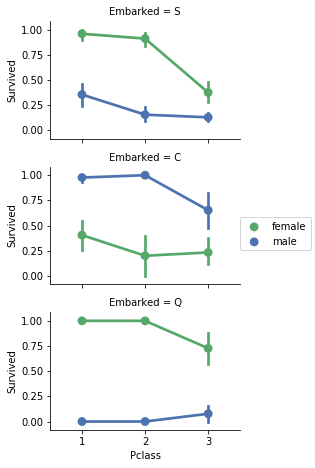

In [215]:
# 相关性 Embarked 
grid = sns.FacetGrid(train_df,row = 'Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


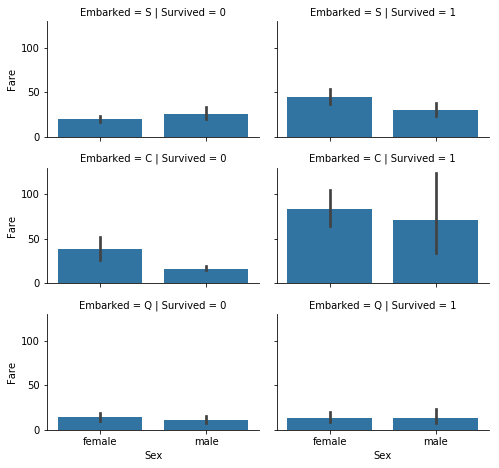

In [216]:
# 相关性 Fare Embarked 
grid = sns.FacetGrid(train_df,row = 'Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare')

In [217]:
# 三，矫正数据

#3.1 去掉无用的 Ticket 、Cabin
print('Before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]
print('After',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [218]:
#3.2 将Name 一列矫正，首先利用正则表达提取关键词。
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
#pd.crosstab(train_df['Title'],train_df['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col',\
    'Don','Dr','Major','Rev','Sir','Jonkheer','Done'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
#train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

tittle_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(tittle_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
#train_df.head()
#矫正时候删掉Name 列
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [219]:
# 3.3 将 Sex 列变为数字型

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,27.0,0,0,13.00,S,5
887,1,1,1,19.0,0,0,30.00,S,2
888,0,3,1,NaN,1,2,23.45,S,2
889,1,1,0,26.0,0,0,30.00,C,1
890,0,3,0,32.0,0,0,7.75,Q,1


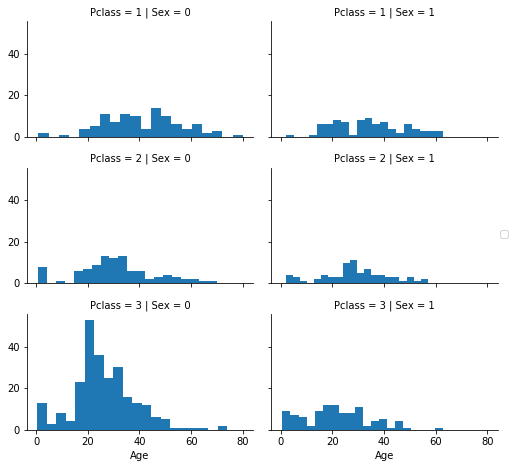

In [220]:
# 3.4 填充Age 列的空值：
# 作者提到了三种方法:
# 1、 一种直接的方法，直接使用均值替换
# 2、 第二种使用更准确的方法，使用与Age相关的数据辅助填充缺失值；此处使用与年龄相关的 Gender 与 Pclass，
#     由于Pclass 与 Gender确定，已知；使用其它数据中Pclass 与 Gender 已知 的中值。
# 3、综合两种方法，随机使用第一种或者第二种方法的值
# 在这我们使用第二种方法。

grid = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

In [221]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[dataset['Sex']==i &\
                        (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5
    #print(age_guess)
    #print(guess_ages)
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i)& (dataset.Pclass == j+1),\
                       'Age'] = guess_ages[i,j] 
            
    dataset['Age'] = dataset['Age'].astype(int)
train_df.tail()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,27,0,0,13.00,S,5
887,1,1,1,19,0,0,30.00,S,2
888,0,3,1,30,1,2,23.45,S,2
889,1,1,0,26,0,0,30.00,C,1
890,0,3,0,32,0,0,7.75,Q,1


In [222]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().\
sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [223]:
for dataset in combine:
    dataset.loc[dataset['Age'] <=16,'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <=64),'Age' ] = 3
    dataset.loc[(dataset['Age'] > 64,'Age')]
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
886,0,2,0,1,0,0,13.00,S,5,"(16.0, 32.0]"
887,1,1,1,1,0,0,30.00,S,2,"(16.0, 32.0]"
888,0,3,1,1,1,2,23.45,S,2,"(16.0, 32.0]"
889,1,1,0,1,0,0,30.00,C,1,"(16.0, 32.0]"
890,0,3,0,1,0,0,7.75,Q,1,"(16.0, 32.0]"


In [224]:
train_df = train_df.drop(['AgeBand'],axis = 1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [225]:
# 3.4 人工的加上一列，Sibsp 与 Parch，一列表示兄弟姐妹的数量，一列表示家人的数量
#   所以将两列合并为一列，Familysize，最终得到一列，就是这名乘客是否孤身一身乘船
#   IsAlone
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().\
sort_values(by = 'Survived',ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [226]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'IsAlone'] =1

train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [227]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis = 1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis = 1)
combine = [train_df,test_df]


     Survived  Pclass  Sex  Age   Fare Embarked  Title  IsAlone
886         0       2    0    1  13.00        S      5        1
887         1       1    1    1  30.00        S      2        1
888         0       3    1    1  23.45        S      2        0
889         1       1    0    1  30.00        C      1        1
890         0       3    0    1   7.75        Q      1        1
     PassengerId  Pclass  Sex  Age      Fare Embarked  Title  IsAlone
413         1305       3    0    1    8.0500        S    1.0        1
414         1306       1    1    2  108.9000        C    0.0        1
415         1307       3    0    2    7.2500        S    1.0        1
416         1308       3    0    1    8.0500        S    1.0        1
417         1309       3    0    1   22.3583        C    4.0        0


In [197]:
# 3.5 人工添加一列，Age * Pclass
for dataset in combine:
    dataset['Age*Class'] = dataset.Age*dataset.Pclass


In [228]:
# 3.6 Embarked 为登船的口岸，直接用众数添加缺失值；然后变为Numberic
freq_port = train_df.Embarked.dropna().mode()[0]

#填充缺失
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
#train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().\
#sort_values(by = 'Survived',ascending = False)

#Numberic
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
print(train_df.tail())
print(test_df.tail())

     Survived  Pclass  Sex  Age   Fare  Embarked  Title  IsAlone
886         0       2    0    1  13.00         0      5        1
887         1       1    1    1  30.00         0      2        1
888         0       3    1    1  23.45         0      2        0
889         1       1    0    1  30.00         1      1        1
890         0       3    0    1   7.75         2      1        1
     PassengerId  Pclass  Sex  Age      Fare  Embarked  Title  IsAlone
413         1305       3    0    1    8.0500         0    1.0        1
414         1306       1    1    2  108.9000         1    0.0        1
415         1307       3    0    2    7.2500         0    1.0        1
416         1308       3    0    1    8.0500         0    1.0        1
417         1309       3    0    1   22.3583         1    4.0        0


In [229]:
# 3.7 改变价格列，分价格等级
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare' ] =1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31),'Fare'] = 2
    dataset.loc[dataset['Fare'] >31,'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'],axis =1)
combine = [train_df,test_df]
train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
886,0,2,0,1,1,0,5,1
887,1,1,1,1,2,0,2,1
888,0,3,1,1,2,0,2,0
889,1,1,0,1,2,1,1,1
890,0,3,0,1,0,2,1,1


In [201]:
####保存处理好的数据。
train_df.to_csv('Processed_train_df.csv',index=False,sep=',')
test_df.to_csv('Processed_test_df.csv',index=False,sep=',')